In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src')) # or the path to your source code
sys.path.insert(0, module_path)
import pandas
from query import query_cdp_data as query
from enrich import enrich_cdp_data as enrich
from ingest_bulk import ingest_cdp_data_bulk as ingest_bulk

In [5]:
# update following
event = {}
event['login_url'] = 'https://login.salesforce.com' 
event['user_name'] = ''
event['password'] = ''
event['client_id'] = ''
event['client_secret'] = ''
event['dlo_name'] = 'athlete_profiles' #CDP org's DLO name
event['dlo_source_name'] = 'athlete_api' #CDP org's Ingestion API source name 
event['dlo_object'] = 'athlete_api_athlete_profiles_E6B17A31__dll' #DLO object name to be queried
event['dlo_filter'] = 'limit 100' #Where clause for the query
event['bulk_operation_type'] = 'upsert' #Where clause for the query

In [7]:
#First load test data

#Upload data using bulk api
# ingest_bulk(event,df)

In [15]:
# Query DLO. # It can take 10 to 30 minutes for data to show up. Make sure to wait before you proceed to next step
df = query(event)
print(len(df))
df.head()

*** query_cdp_data start
got CDP connection
Query results took 0:00:02.075595 time, for total records 100
*** query_cdp_data end
100


,email__c,first_name__c,datasource__c,city__c,datasourceobject__c,maid__c,state__c,gender__c,created__c,score__c,last_name__c,date_id
0,customer-648322@test.cdpdata,fname-648322,athlete_api_846862a0_bc08_4018_a28b_910b7338dbf2,austin,athlete_api_athlete_profiles_E6B17A31,648322.000000000000000000,TX,Male,None,None,lname-648322,2022-10-18 18:20:54.472 UTC
1,customer-648330@test.cdpdata,fname-648330,athlete_api_846862a0_bc08_4018_a28b_910b7338dbf2,austin,athlete_api_athlete_profiles_E6B17A31,648330.000000000000000000,TX,Male,None,None,lname-648330,2022-10-18 18:20:54.472 UTC
2,customer-648331@test.cdpdata,fname-648331,athlete_api_846862a0_bc08_4018_a28b_910b7338dbf2,austin,athlete_api_athlete_profiles_E6B17A31,648331.000000000000000000,TX,Male,None,None,lname-648331,2022-10-18 18:20:54.472 UTC
3,customer-648358@test.cdpdata,fname-648358,athlete_api_846862a0_bc08_4018_a28b_910b7338dbf2,austin,athlete_api_athlete_profiles_E6B17A31,648358.000000000000000000,TX,Male,None,None,lname-648358,2022-10-18 18:20:54.472 UTC
4,customer-648363@test.cdpdata,fname-648363,athlete_api_846862a0_bc08_4018_a28b_910b7338dbf2,austin,athlete_api_athlete_profiles_E6B17A31,648363.000000000000000000,TX,Male,None,None,lname-648363,2022-10-18 18:20:54.472 UTC


In [16]:
# Enrich DLO
df = enrich(df)

*** enrich_cdp_data start
***Enrich end


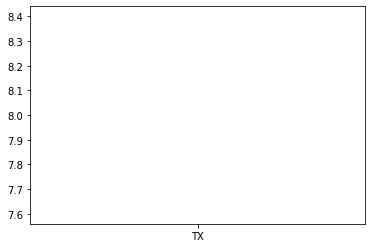

In [20]:
# Visualize enriched data
from matplotlib import pyplot as plt
plt.plot(df["state__c"], df["score"])
plt.show()

In [10]:
# Bulk update Enriched DLO
ingest_bulk(event,df)

***ingest_cdp_data_bulk start
got connection
m04tszrqg-yw09jsmmydcyrzg4.c360a.salesforce.com
Posting to https://m04tszrqg-yw09jsmmydcyrzg4.c360a.salesforce.com/api/v1/ingest/jobs/
posting job to url=https://m04tszrqg-yw09jsmmydcyrzg4.c360a.salesforce.com/api/v1/ingest/jobs
Starting bulk job for execution
{'object': 'athlete_profiles', 'id': 'b293c4cd-3a99-4e37-8b66-58803340c359', 'operation': 'upsert', 'sourceName': 'athlete_api', 'createdById': '005Dn000000ZimmIAC', 'createdDate': '2022-11-19T20:20:36.488928Z', 'systemModstamp': '', 'state': 'Open', 'contentType': 'CSV', 'apiVersion': 'v1', 'contentUrl': '/api/v1/ingest/jobs/b293c4cd-3a99-4e37-8b66-58803340c359/batches'}
initiate job
b293c4cd-3a99-4e37-8b66-58803340c359
https://m04tszrqg-yw09jsmmydcyrzg4.c360a.salesforce.com/api/v1/ingest/jobs/b293c4cd-3a99-4e37-8b66-58803340c359/batches
_post_ingest_bulk_job_upload_data called
after binary conversion
Got header csv
{'accepted': True}
added data
{'accepted': True}
https://m04tszrqg-yw

{'object': 'athlete_profiles',
 'id': 'b293c4cd-3a99-4e37-8b66-58803340c359',
 'operation': 'upsert',
 'sourceName': 'athlete_api',
 'createdById': '005Dn000000ZimmIAC',
 'createdDate': '2022-11-19T20:20:36.488928Z',
 'systemModstamp': '',
 'state': 'UploadComplete',
 'contentType': 'CSV',
 'apiVersion': 'v1'}

In [18]:
df.head()

,email__c,first_name__c,city__c,maid__c,state__c,gender__c,created__c,score__c,last_name__c,date_id,score
0,customer-648322@test.cdpdata,fname-648322,austin,648322.000000000000000000,TX,Male,None,None,lname-648322,2022-10-18 18:20:54.472 UTC,8
1,customer-648330@test.cdpdata,fname-648330,austin,648330.000000000000000000,TX,Male,None,None,lname-648330,2022-10-18 18:20:54.472 UTC,8
2,customer-648331@test.cdpdata,fname-648331,austin,648331.000000000000000000,TX,Male,None,None,lname-648331,2022-10-18 18:20:54.472 UTC,8
3,customer-648358@test.cdpdata,fname-648358,austin,648358.000000000000000000,TX,Male,None,None,lname-648358,2022-10-18 18:20:54.472 UTC,8
4,customer-648363@test.cdpdata,fname-648363,austin,648363.000000000000000000,TX,Male,None,None,lname-648363,2022-10-18 18:20:54.472 UTC,8
